In [4]:
import numpy as np

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path = "/Users/jagadish/Desktop/amazon_delivery.csv"
df = pd.read_csv(file_path)

In [9]:
df.head()


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [11]:
df.shape

(43739, 16)

In [27]:
print(df.isnull().sum())

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64


In [15]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [17]:
df['Agent_Rating'].fillna(df['Agent_Rating'].mean(), inplace = True)

/var/folders/yr/wwmktxzn6jnbptqcbngzhkl40000gn/T/ipykernel_5988/2931660107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Agent_Rating'].fillna(df['Agent_Rating'].mean(), inplace = True)


In [18]:
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])


In [22]:
print(df.isnull().sum())

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64


In [26]:
# Unique values in categorical columns
categorical_columns = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in Weather: ['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy']
Unique values in Traffic: ['High ' 'Jam ' 'Low ' 'Medium ' 'NaN ']
Unique values in Vehicle: ['motorcycle ' 'scooter ' 'van' 'bicycle ']
Unique values in Area: ['Urban ' 'Metropolitian ' 'Semi-Urban ' 'Other']
Unique values in Category: ['Clothing' 'Electronics' 'Sports' 'Cosmetics' 'Toys' 'Snacks' 'Shoes'
 'Apparel' 'Jewelry' 'Outdoors' 'Grocery' 'Books' 'Kitchen' 'Home'
 'Pet Supplies' 'Skincare']


In [29]:
# caluculating average delivery time by category 
avg_delivery_time_by_category = df.groupby('Category')['Delivery_Time'].mean()
print(avg_delivery_time_by_category)


Category
Apparel         132.048789
Books           131.021601
Clothing        130.483690
Cosmetics       132.902503
Electronics     130.837136
Grocery          26.539576
Home            130.955307
Jewelry         130.753034
Kitchen         132.326973
Outdoors        131.059337
Pet Supplies    131.291822
Shoes           131.151538
Skincare        132.027417
Snacks          131.904332
Sports          132.247150
Toys            129.395901
Name: Delivery_Time, dtype: float64


In [12]:
# Average delivery time by weather condition
avg_delivery_time_by_weather = df.groupby('Weather')['Delivery_Time'].mean()
print(avg_delivery_time_by_weather)

Weather
Cloudy    35.0
Rainy     42.5
Sunny     40.0
Name: Delivery_Time, dtype: float64


In [31]:
#calculate average delivery time by are 
avg_delivery_time_by_area = df.groupby('Area')['Delivery_Time'].mean()
print(avg_delivery_time_by_area)

Area
Metropolitian     129.702459
Other             104.464851
Semi-Urban        238.552632
Urban             109.434520
Name: Delivery_Time, dtype: float64


In [37]:
#imapct of traffic on delivery time
avg_delivery_time_by_traffic = df.groupby('Traffic')['Delivery_Time'].mean()
print(avg_delivery_time_by_traffic)

Traffic
High      129.424115
Jam       147.758980
Low       101.354557
Medium    126.839669
Name: Delivery_Time, dtype: float64


In [33]:
df['Traffic'] = df['Traffic'].str.strip()


In [36]:
import numpy as np
df['Traffic'] = df['Traffic'].replace('NaN', np.nan)


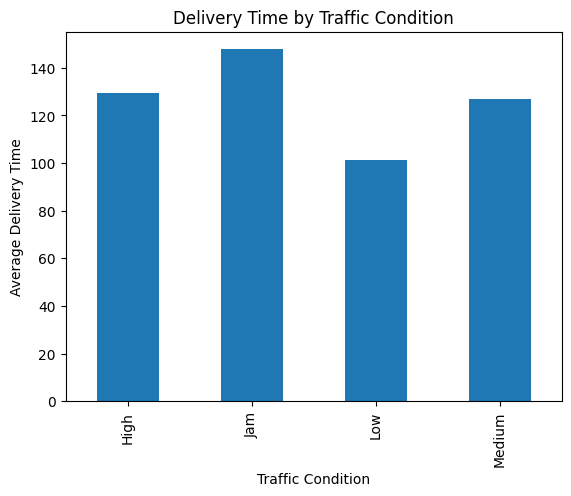

In [38]:
# Bar plot for delivery time by traffic condition
avg_delivery_time_by_traffic.plot(kind='bar', title='Delivery Time by Traffic Condition', ylabel='Average Delivery Time', xlabel='Traffic Condition')
plt.show()


In [39]:
#correlation analysis
correlation_matrix = df[['Agent_Age', 'Agent_Rating', 'Delivery_Time']].corr()
print(correlation_matrix)

               Agent_Age  Agent_Rating  Delivery_Time
Agent_Age       1.000000     -0.067889       0.254618
Agent_Rating   -0.067889      1.000000      -0.289854
Delivery_Time   0.254618     -0.289854       1.000000


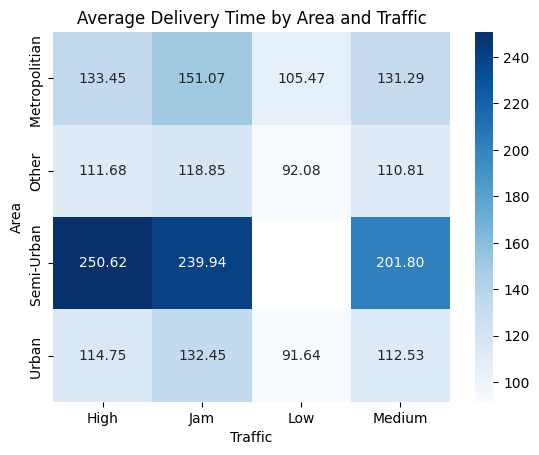

In [42]:
# Bar plot: Delivery time by area and traffic

# Group data by Area and Traffic, then calculate mean delivery time
area_traffic_data = df.groupby(['Area', 'Traffic'])['Delivery_Time'].mean().unstack()

# Plot heatmap
sns.heatmap(area_traffic_data, annot=True, fmt=".2f", cmap="Blues")
plt.title("Average Delivery Time by Area and Traffic")
plt.ylabel("Area")
plt.xlabel("Traffic")
plt.show()


Agent_Age_Group
18-25    109.185705
26-35    128.153191
36-50    139.792879
51-65    150.000000
Name: Delivery_Time, dtype: float64


/var/folders/yr/wwmktxzn6jnbptqcbngzhkl40000gn/T/ipykernel_1100/977634183.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_age_group = df.groupby('Agent_Age_Group')['Delivery_Time'].mean()


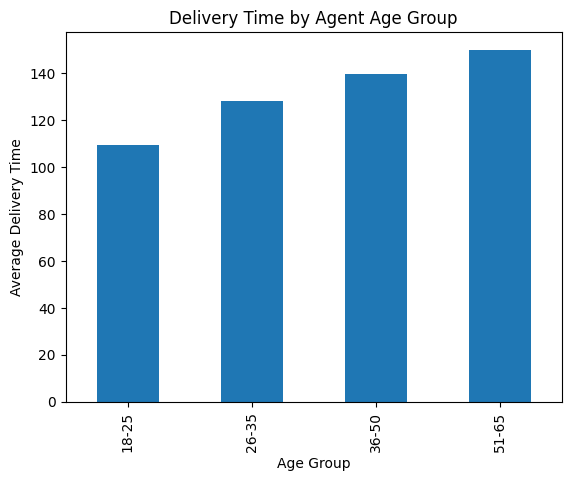

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulate example data
data = {
    'Agent_Age': [20, 30, 40, 55],
    'Delivery_Time': [109.185705, 128.153191, 139.792879, 150.0]
}
df = pd.DataFrame(data)

# Add 'Agent_Age_Group' based on age bins
df['Agent_Age_Group'] = pd.cut(df['Agent_Age'], bins=[18, 25, 35, 50, 65], labels=['18-25', '26-35', '36-50', '51-65'])

# Average delivery time by age group
avg_time_by_age_group = df.groupby('Agent_Age_Group')['Delivery_Time'].mean()
print(avg_time_by_age_group)

# Plot the results
avg_time_by_age_group.plot(kind='bar', title='Delivery Time by Agent Age Group', ylabel='Average Delivery Time', xlabel='Age Group')
plt.show()



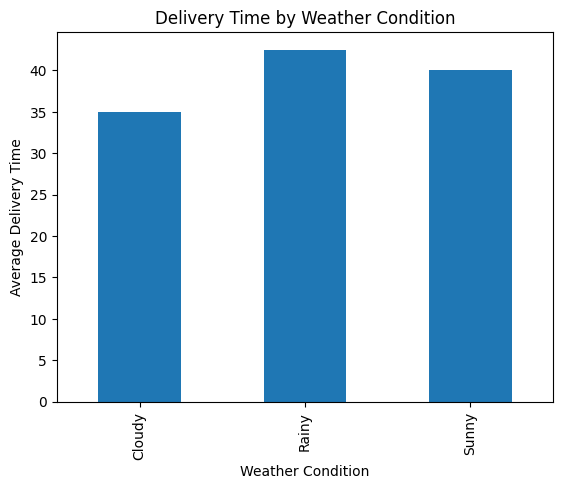

In [13]:
avg_delivery_time_by_weather.plot(kind='bar', title='Delivery Time by Weather Condition', ylabel='Average Delivery Time', xlabel='Weather Condition')
plt.show()
